 # <span style = 'color : Green' >Bike Sharing Assignment by  Chetan Shrivastava

## **Problem Statement**<br>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands <br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal**:<br>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Importing required libraries

In [470]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# <span style = 'color : Red' > Reading and Understanding the Data

In [473]:
bike = pd.read_csv("day.csv")

## <span style = 'color : Red' > Exploratory Data Analysis

In [475]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [476]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [477]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [478]:
# Check the shape of the data frame 
bike.shape

(730, 16)

<span style='background: lightGreen '> Finding</span> :

Dataset has 730 rows and 16 columns.

Except one column that is "dteday" is of date type, all other are either float or integer type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

# DATA QUALITY CHECK
<span style='background: lightGreen '> Check for NULL/MISSING values</span>

In [480]:
# percentage of missing values in each column
#bike.isnull().sum()*100/bike.shape[0]
#or
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [481]:
# row-wise null count percentage
round(100*(bike.isnull().sum(axis=1)/len(bike)),2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

### Conclusion: There are no missing / Null values either in columns or rows

<span style='background: lightGreen '> Duplicate Check</span>

In [484]:
bike_dupl = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dupl.drop_duplicates(subset=None, inplace=True)

In [485]:
bike_dupl.shape

(730, 16)

In [486]:
bike.shape

(730, 16)

The shape after running the drop duplicate command is same as the original dataframe.
### Conclusion : There were no duplicates  in the dataset.

## Data Cleaning: 
    
 <span style='background: lightGreen '>Checking value_counts() for entire dataframe</span>.

This will help to identify any Unknow/Junk values present in the dataset

In [489]:
bike.value_counts(ascending=False).head(1)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985    1
Name: count, dtype: int64

There seems to be no Junk/Unknown values in the entire dataset.

 <span style='background: lightGreen '> Redundant & unwanted columns</span>

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1) instant : Its only an index value

2) dteday : This has the date, Since we already have seperate columns for 'year' & 'month', seems to be redudant.

3) casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. 


In [492]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [493]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [494]:
bike.shape

(730, 12)

<span style='background: lightGreen '> Conver **int64** to **Catagorical** Variables </span>

In [496]:
# Check the datatypes before convertion
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [497]:
#Store Original Dataframe for future use
bike_original=bike.copy()
bike_original.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


* season','mnth','weekday','weathersit' are catagorical variables not int64 hence convreting them to catagorical 

In [499]:
# Converting 'Season' to a categorical variable
bike['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
bike['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [500]:
# Converting 'mnth' to categorical variable 

bike['mnth'] = bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike['mnth'].value_counts()

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64

In [501]:
# Converting 'weekday' to object in preparation for making dummy variable

bike['weekday'] = bike['weekday'].astype('object')
bike['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [502]:
# Converting 'weathersit' to a categorical variable

bike['weathersit']=bike['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])
bike['weathersit'].value_counts()

weathersit
Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: count, dtype: int64

In [503]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


##  <span style = 'color : Green' > Univariate Analysis

<span style='background: lightGreen '>Visualizing Binary Columns (Numerical Variables)</span>  

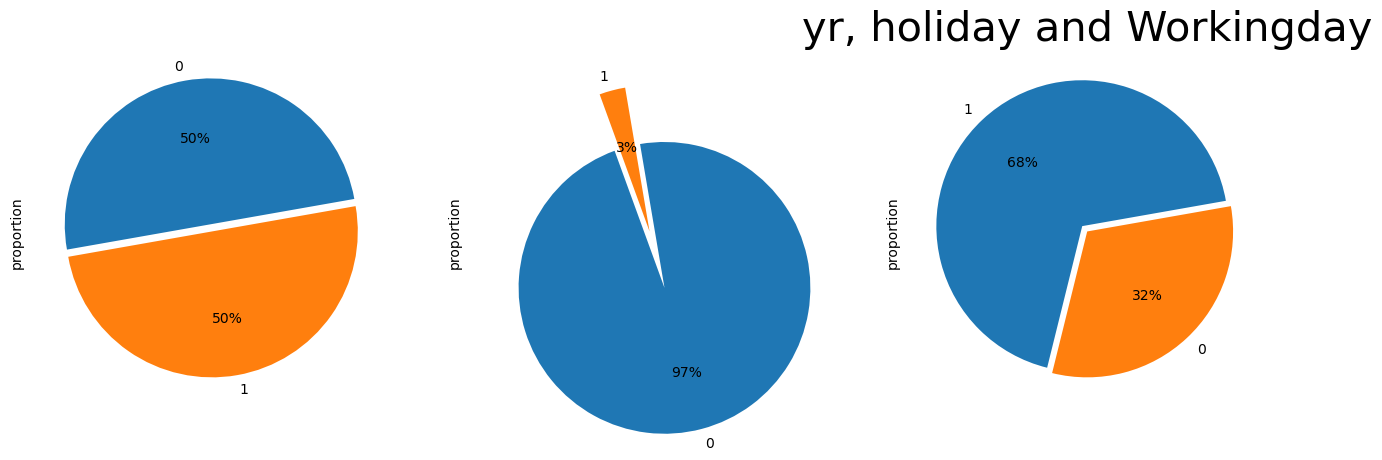

In [506]:
plt.figure(figsize = [16,15])
plt.subplot(131)
bike['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
bike['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
bike['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('yr, holiday and Workingday',fontsize=30)
plt.show()

* By observing the 3 pi charts we can came to conclusion that 
    - 'Yr' is expected to be 50%-50% daily records of bike usage. 
    - Significantly less number of holidays(1) as compared to non-holidays(0) hence bike usage is more in 0. 
    - The same case applies to 'workingday' due to higher number of days vs non-working days.

<span style='background: lightGreen '>Visualizing Binary Columns (Categorical Variables)  </span>  

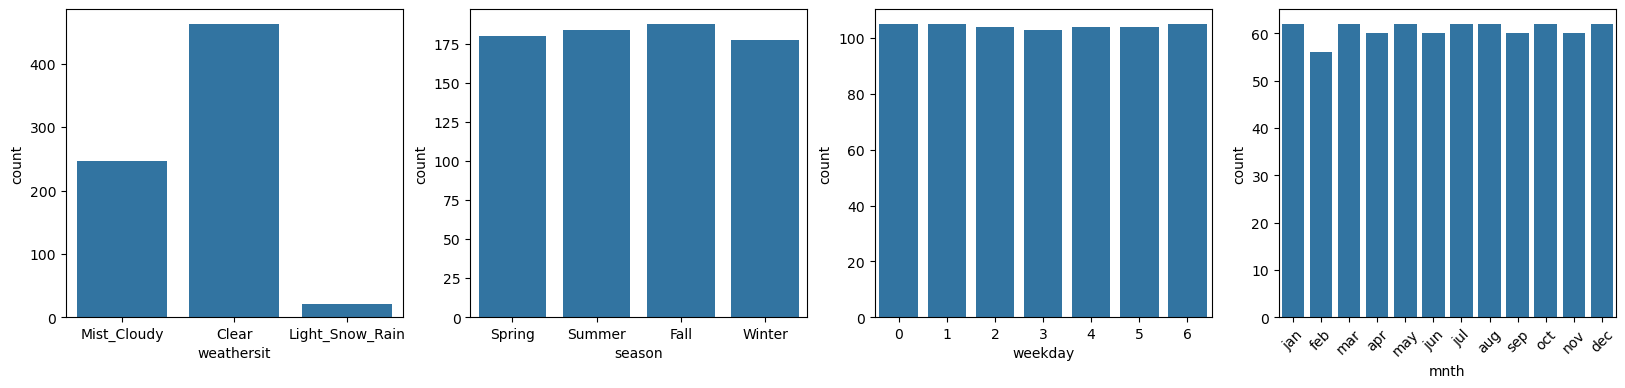

In [509]:
plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = bike, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = bike, x = 'season')
plt.subplot(143)
sns.countplot(data = bike, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = bike, x = 'mnth')
plt.show()

* By observing the plots we can came to conclusion that
    - When 'weathersit' is Clear, the bikes are usage are more. 
    - The rest of the variables show very close values.

##  <span style = 'color : Green' > Bivariate Analysis

<span style='background: lightGreen '>Visualizing Numerical Variables vs 'cnt' </span>  

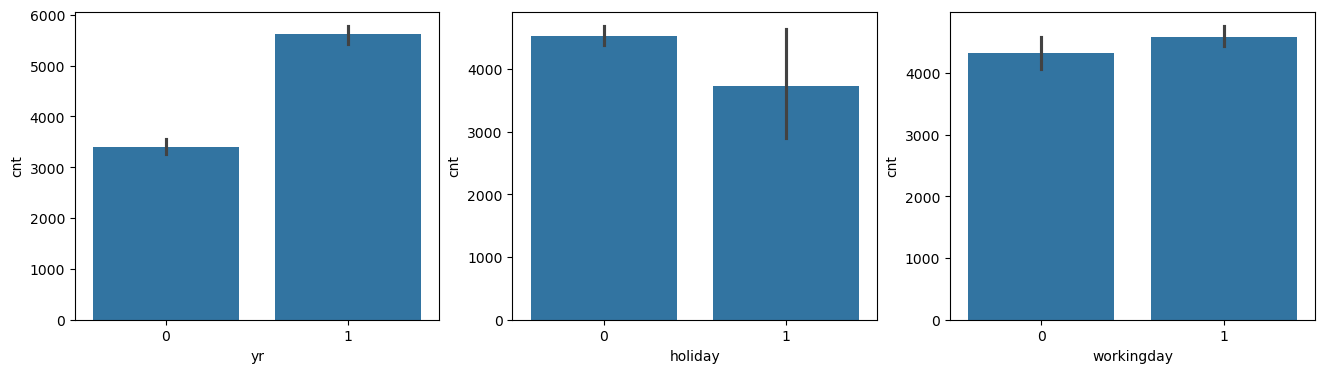

In [513]:
plt.figure(figsize = [16,4])
plt.subplot(131)
sns.barplot(x='yr', y='cnt', data = bike)
plt.subplot(132)
sns.barplot(x='holiday', y='cnt', data = bike)
plt.subplot(133)
sns.barplot(x='workingday', y='cnt', data = bike)
plt.show()

* By observing the plots we can came to conclusion that
    - There is a increase in number of bike users from year 2018(0) to year 2019(1).
    - There are more users during holidays(0) as compared to Non holidays(1).
    - There is a very little discrepancy between users of BoomBike on a working day(1) and non-working day(0).

<span style='background: lightGreen '>Visualizing Catagorical Variables Variables vs 'cnt' </span> <br>
* Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
* To see how each of the predictor variable stackup against the target variable.

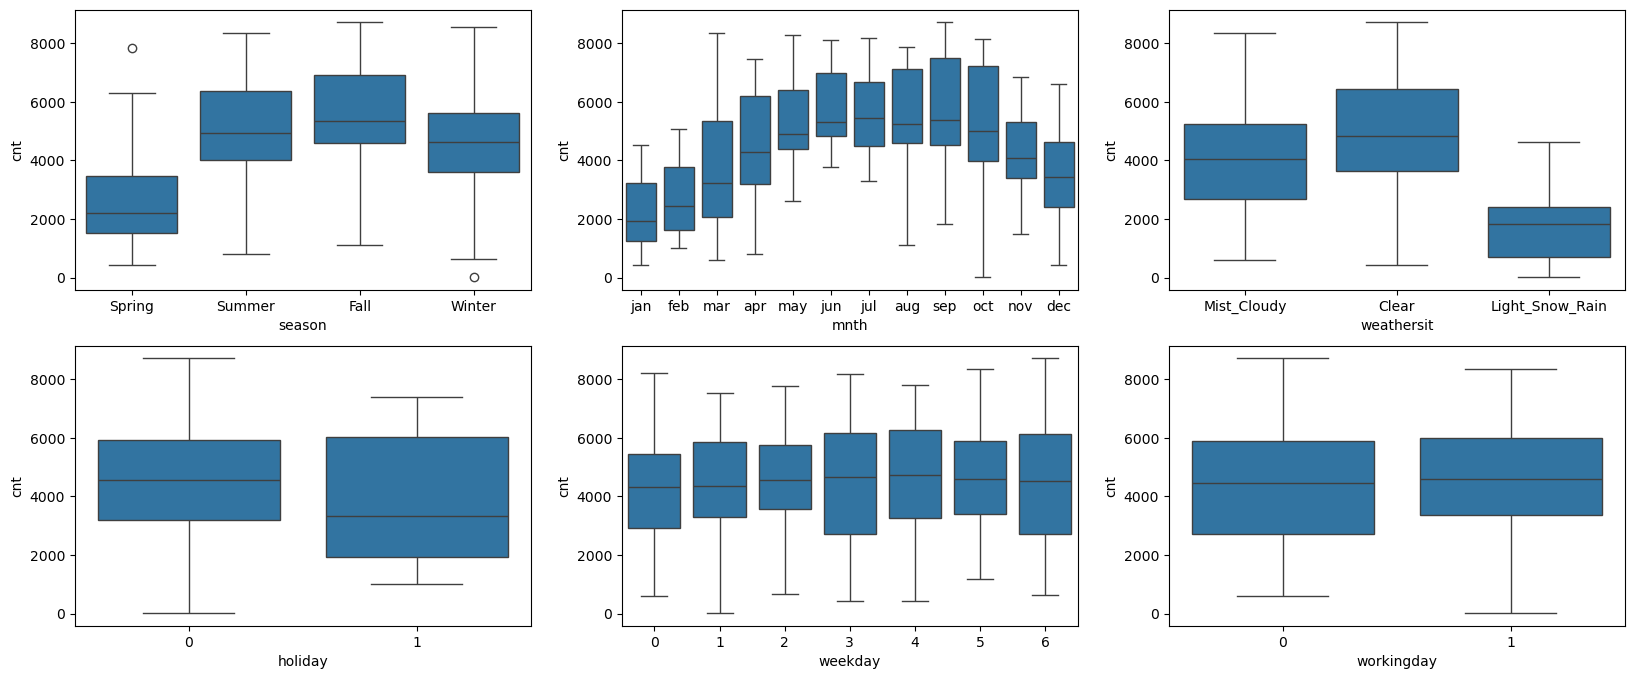

In [516]:
plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

Insights <br>
There were 6 categorical variables in the dataset.<br>

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .<br>

Conclusion : <br>


* **season**: About 32% of bookings happened in fall, followed by summer and winter. Season influences bookings.<br>

* **Month**: Summer months (May-September) saw about 10% monthly bookings, showing a clear seasonal trend.<br>

* **WeatherSit**: Nearly 67% of bookings occurred in good weather, making it a significant predictor of demand.<br>

* **Holiday**: Most of bookings were on non-holidays, indicating holiday status isn't a strong predictor.<br>

* **Weekday**: Bookings were consistent  across weekdays, with unclear influence as a predictive variable.<br>

* **Workingday**: Most bookings occurred on working days, indicating working day status affects bike demand.<br>



##  <span style = 'color : Green' >  Correlation Matrix

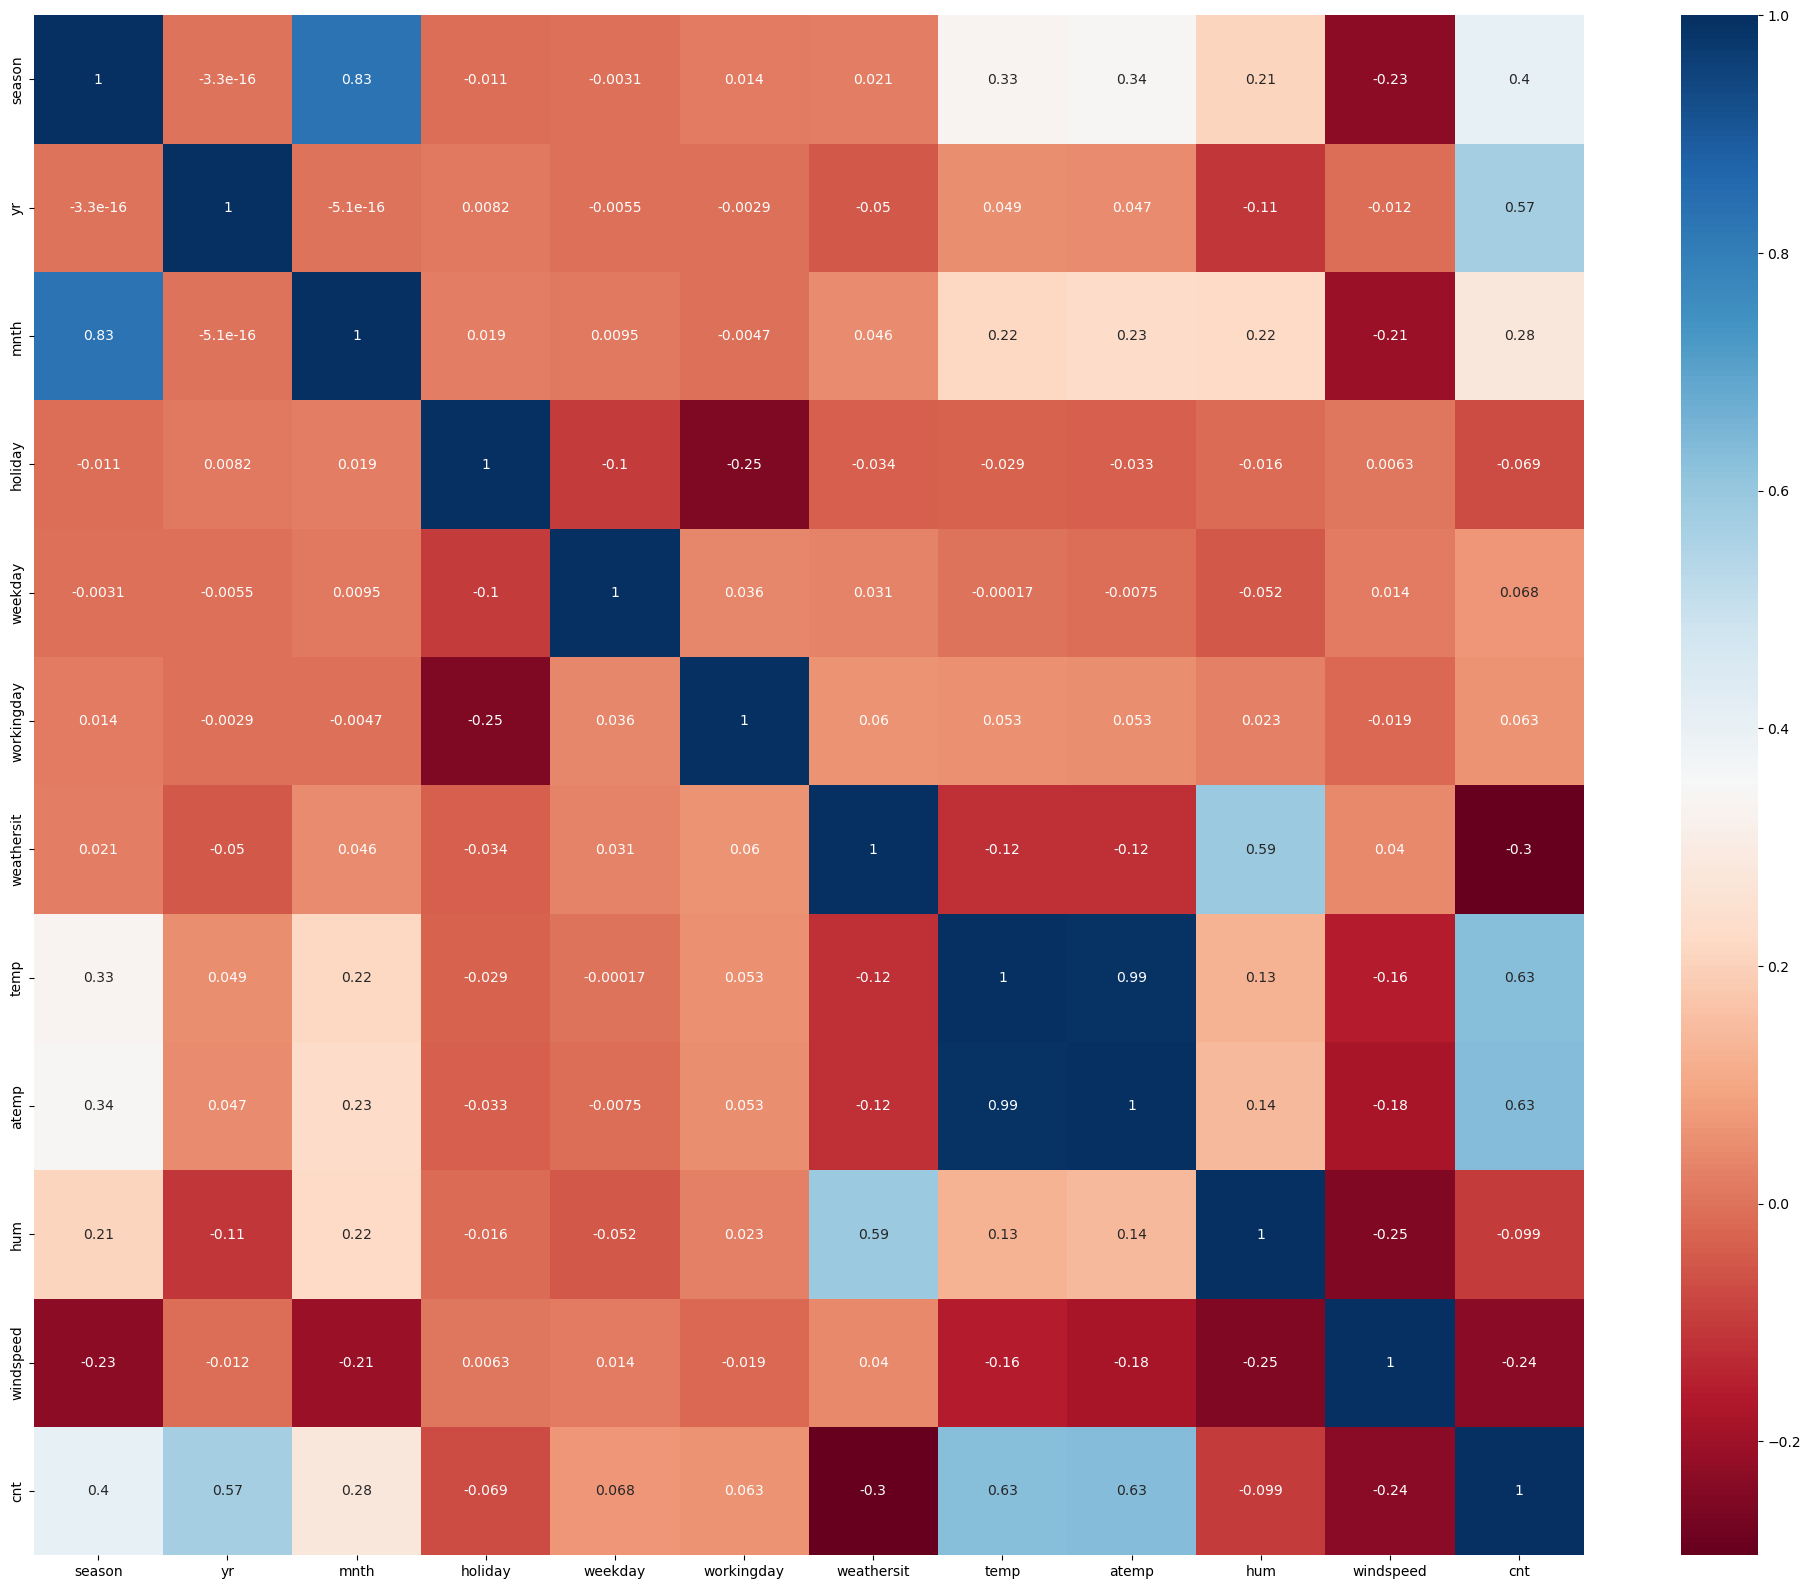

In [518]:

plt.figure(figsize = (25,20))
sns.heatmap(bike_original.corr(), annot = True, cmap="RdBu")
plt.show()

Insights:<br>

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.<br>

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.<br>

# <span style = 'color : Red' > Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

This below code does 3 things:<br>
        1) Create Dummy variable. <br>
        2) Drop original variable for which the dummy was created. <br>
        3) Drop first dummy variable for each set of dummies created.

In [523]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [524]:
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  mnth_aug                    730 non-null    bool   
 12  mnth_dec                    730 non-null    bool   
 13  mnth_feb                    730 non

In [525]:
bike.shape

(730, 30)

In [526]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

# <span style = 'color : Red' >  SPLITTING THE DATA
Splitting the data to <span style='background: lightGreen '> Train and Test</span>  : - We will now split the data into TRAIN and TEST (70:30 ratio)
We will use train_test_split method from sklearn package for this

* Check the shape & info  before spliting

In [529]:
bike.shape

(730, 30)

In [530]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  mnth_aug                    730 non-null    bool   
 12  mnth_dec                    730 non-null    bool   
 13  mnth_feb                    730 non

In [531]:
import sklearn
from sklearn.model_selection import train_test_split

* We should specify 'random_state' so that the train and test data set always have the same rows, respectively

In [533]:
df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 333)

* Verify the info and shape of the dataframes after split:

In [535]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    bool   
 9   season_Summer               510 non-null    bool   
 10  season_Winter               510 non-null    bool   
 11  mnth_aug                    510 non-null    bool   
 12  mnth_dec                    510 non-null    bool   
 13  mnth_feb                    510 non-nu

In [536]:
df_train.shape

(510, 30)

In [537]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   cnt                         219 non-null    int64  
 8   season_Spring               219 non-null    bool   
 9   season_Summer               219 non-null    bool   
 10  season_Winter               219 non-null    bool   
 11  mnth_aug                    219 non-null    bool   
 12  mnth_dec                    219 non-null    bool   
 13  mnth_feb                    219 non-nul

In [538]:
df_test.shape

(219, 30)

In [539]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    bool   
 9   season_Summer               510 non-null    bool   
 10  season_Winter               510 non-null    bool   
 11  mnth_aug                    510 non-null    bool   
 12  mnth_dec                    510 non-null    bool   
 13  mnth_feb                    510 non-nu

In [540]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

* By Observing tha data we can say that 'temp', 'atemp', 'hum', 'windspeed','cnt' are the numerical variables 

<span style='background: lightGreen '> Let's make a pairplot of all the numeric variables.</span> <br>

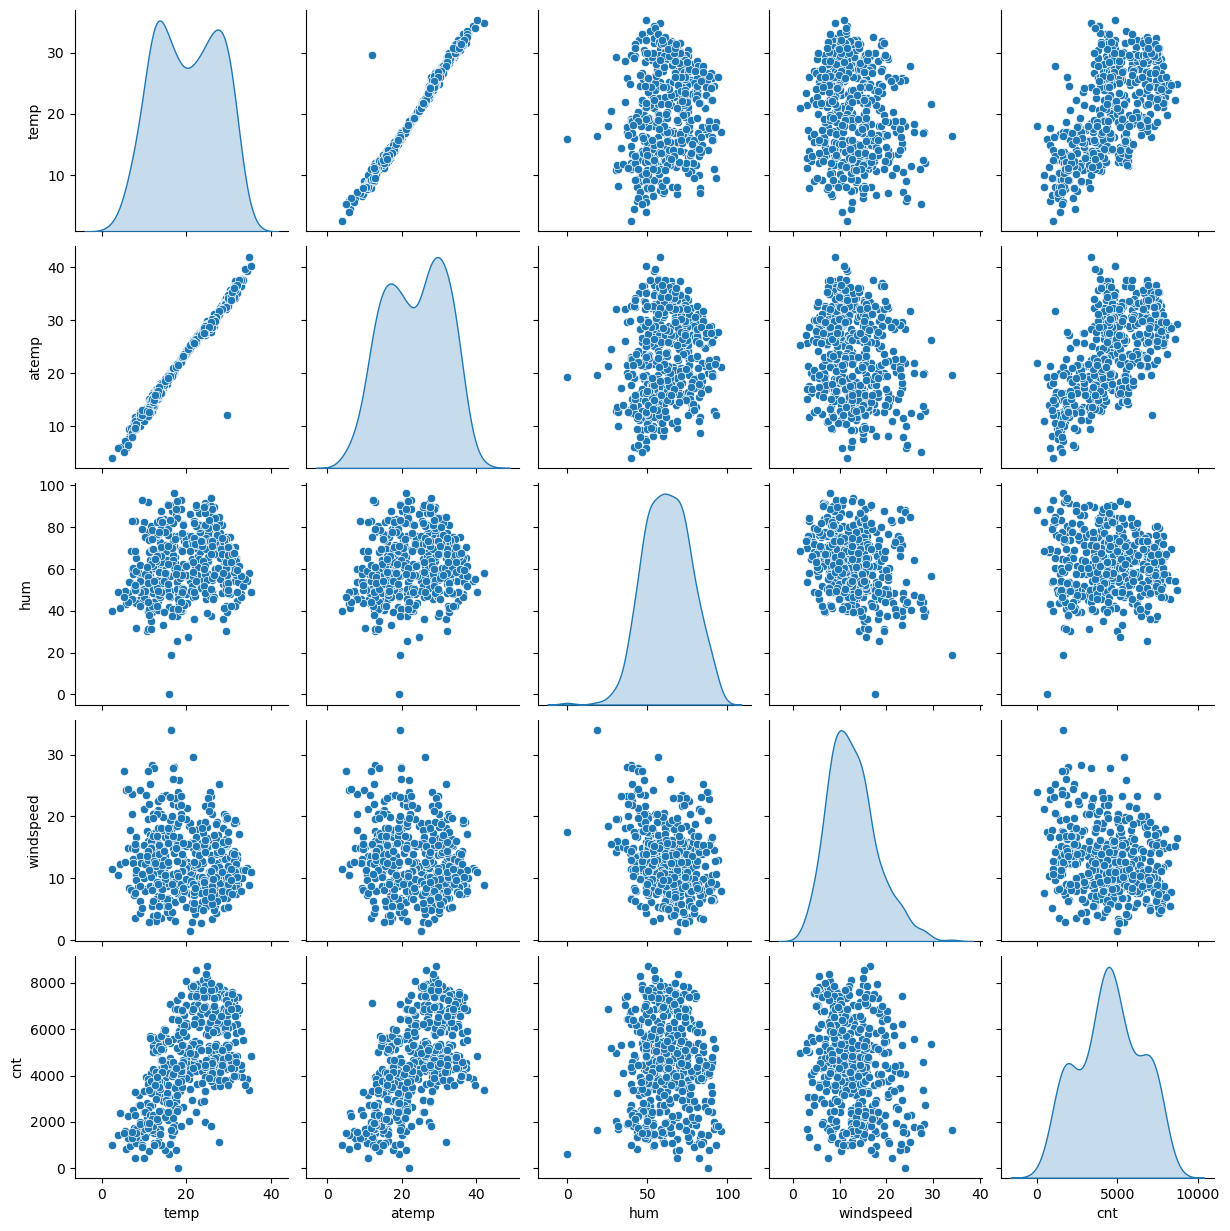

In [543]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

The above Pair-Plot  tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

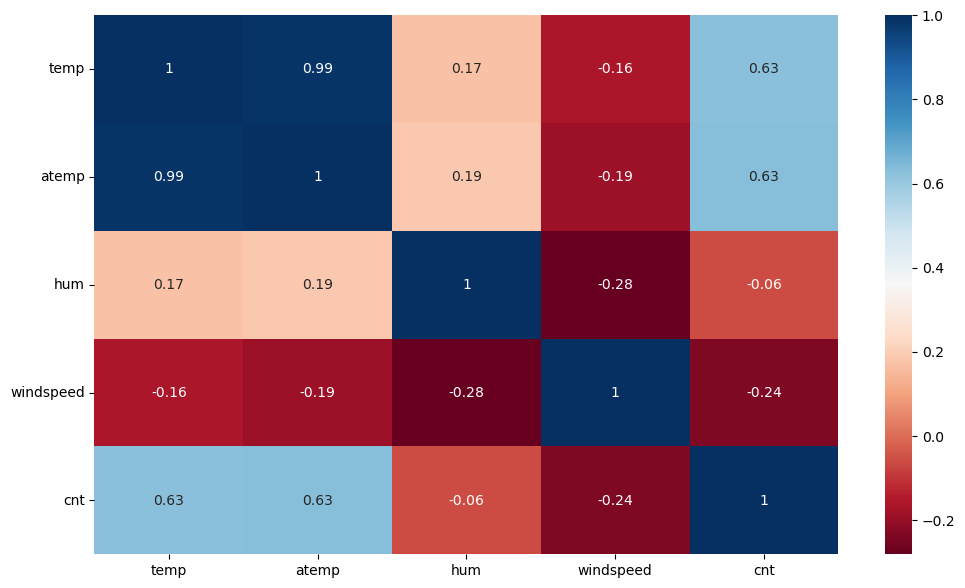

In [545]:
plt.figure(figsize = (12,7))
sns.heatmap(bike_num.corr(), annot = True, cmap="RdBu")
#plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

The above correlation plot tells us that there is a high correlation between 'temp','atemp' vs 'cnt'

# <span style = 'color : Red' > RESCALING THE FEATURES

In [548]:
from sklearn.preprocessing import MinMaxScaler

In [549]:
scaler = MinMaxScaler()

In [550]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,False,True,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,False,False,...,True,False,False,False,False,False,False,True,False,False
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,False,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,False,False,...,False,False,False,False,False,False,False,False,False,True
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,True,False,...,False,False,False,False,False,False,False,False,False,False


In [551]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [552]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [553]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,False,True,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,False,False,...,True,False,False,False,False,False,False,True,False,False
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,False,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,False,False,...,False,False,False,False,False,False,False,False,False,True
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,True,False,...,False,False,False,False,False,False,False,False,False,False


In [554]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# <span style = 'color : Red' > BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building


In [556]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

**RFE**(
Recursive feature elimination): We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [558]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [559]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [560]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 13),
 ('season_Winter', False, 2),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 6),
 ('mnth_jul', False, 9),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 11),
 ('mnth_may', False, 10),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 3),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', False, 8)]

In [561]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_sep', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [562]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'season_Winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'weekday_6', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [563]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [564]:
# Convert y_train to numeric if it's not already
y_train = pd.to_numeric(y_train, errors='coerce')  # This converts non-numeric to NaN

# Handle NaN values, if any
y_train = y_train.fillna(y_train.mean())  # You can also use other methods to handle NaNs, like dropna()


In [565]:


# Add a constant (intercept term) to X_train_sm
X_train_sm = sm.add_constant(X_train_rfe)
# Fit the OLS model
lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()

# Print the summary of the regression model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          3.45e-172
Time:                        16:38:39   Log-Likelihood:                 472.12
No. Observations:                 510   AIC:                            -914.2
Df Residuals:                     495   BIC:                            -850.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# <span style = 'color : Red' >Building Linear Model using STATS MODEL
## <span style='background: lightGreen '> ***Model - 1***  </span>  <br>
VIF Check

In [567]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [568]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ... (your code to create X_train_rfe) ...

# Check data types and convert if necessary
for col in X_train_rfe.columns:
    if X_train_rfe[col].dtype == 'object':
        X_train_rfe[col] = pd.to_numeric(X_train_rfe[col], errors='coerce')  # 'coerce' handles errors

# Handle missing values
X_train_rfe.fillna(X_train_rfe.mean(), inplace=True)



In [569]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

# Identify boolean columns
boolean_cols = X_train_rfe.select_dtypes(include='bool').columns
# Convert boolean columns to integers
for col in boolean_cols:
    X_train_rfe[col] = X_train_rfe[col].astype(int)
X_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_Light_Snow_Rain
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,0,0,0,0,0,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0,1,0.477697,0.463017,0.424242,0.274350,0,0,0,0,0,0,1,0
444,1,0,1,0.588804,0.569931,0.853247,0.138467,0,0,0,0,1,0,0,0
46,0,0,1,0.322889,0.311266,0.439977,0.472919,1,0,0,0,1,0,0,0
374,1,0,1,0.310971,0.314713,0.671711,0.340487,1,0,0,1,0,0,0,0


In [570]:
# Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_train_rfe.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
print(vif)

                      features  VIF Factor
0                           yr    1.990389
1                      holiday         inf
2                   workingday         inf
3                         temp  337.569859
4                        atemp  346.761030
5                          hum   11.033290
6                    windspeed    4.846503
7                season_Spring    1.889934
8                     mnth_sep    1.164015
9                    weekday_1         inf
10                   weekday_2         inf
11                   weekday_3         inf
12                   weekday_4         inf
13                   weekday_5         inf
14  weathersit_Light_Snow_Rain    1.116643


In [571]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()

In [572]:
# Check the parameters obtained

lr1.params

const                         0.443354
yr                            0.231455
holiday                      -0.014722
workingday                    0.012003
temp                          0.154943
atemp                         0.251008
hum                          -0.243610
windspeed                    -0.201889
season_Spring                -0.153410
mnth_sep                      0.077933
weekday_1                    -0.021438
weekday_2                    -0.005449
weekday_3                     0.008134
weekday_4                     0.006740
weekday_5                     0.009293
weathersit_Light_Snow_Rain   -0.225762
dtype: float64

In [573]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          3.45e-172
Time:                        16:38:39   Log-Likelihood:                 472.12
No. Observations:                 510   AIC:                            -914.2
Df Residuals:                     495   BIC:                            -850.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## <span style='background: lightGreen '> ***Model - 2***  </span>  <br>
* Removing the variable 'atemp' based on its Very High 'VIF' value.<br>
* Even though the VIF of atemp is second highest, we decided to drop 'atemp' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.<br> 

In [575]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

VIF Check

In [577]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
8,weekday_1,inf
9,weekday_2,inf
10,weekday_3,inf
11,weekday_4,inf
12,weekday_5,inf
3,temp,332.48
4,atemp,328.25
5,windspeed,4.57


In [578]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [579]:
lr2.params

const                         0.268101
yr                            0.238092
holiday                      -0.010918
workingday                    0.011251
temp                          0.196117
atemp                         0.197064
windspeed                    -0.144278
season_Spring                -0.143892
mnth_sep                      0.064450
weekday_1                    -0.023779
weekday_2                    -0.006783
weekday_3                     0.008161
weekday_4                     0.010349
weekday_5                     0.012386
weathersit_Light_Snow_Rain   -0.282180
dtype: float64

In [580]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     148.5
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.55e-161
Time:                        16:38:39   Log-Likelihood:                 444.09
No. Observations:                 510   AIC:                            -860.2
Df Residuals:                     496   BIC:                            -800.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## <span style='background: lightGreen '> ***Model - 3***  </span>  <br>
* Removing the variable 'hum' based on its Very High 'VIF' value.

In [582]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

KeyError: "['hum'] not found in axis"

VIF Check

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [ ]:
# Check the parameters obtained

lr3.params

In [ ]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

## <span style='background: lightGreen '> ***Model - 4***  </span>  <br>

* Removing the variable windspeed based on its Very High 'VIF' value.
* Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.<br> 

In [ ]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

VIF Check

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [ ]:
# Check the parameters obtained

lr4.params

In [ ]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

## <span style='background: lightGreen '> ***Model - 5***  </span>  <br>

* All Variables VIF values are well below 5. The 'mnth_Jul' variable having its High P-value 0.048 which is close to 0.05 hence for safety purpose I drop this variable.

In [ ]:
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

VIF Check

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [ ]:
# Check the parameters obtained

lr5.params

In [ ]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


* This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# <span style = 'color : Red' > Final Model Interpretation <br>
Hypothesis Testing:<br>
Hypothesis testing states that:<br>

H0:B1=B2=...=Bn=0<br>
H1: at least one Bi!=0

lr6 model coefficient values

const                `=`          0.248891<br>
yr                       `=`      0.232965<br>
temp                         `=`  0.375922<br>
season_Spring      `=`           -0.087867<br>
season_Winter          `=`        0.084976<br>
mnth_Dec                   `=`   -0.080011<br>
mnth_Feb              `=`        -0.057742<br>
mnth_Jan                  `=`    -0.080914<br>
mnth_Nov                     `=` -0.082132<br>
mnth_Sep              `=`         0.065011<br>
weathersit_Light_Snow_Rain `=`   -0.333164<br>
weathersit_Mist_Cloudy        `=`-0.072447<br>


* From the lr5 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

*  F-statistic:                     202.8
* Prob (F-statistic):          5.79e-176<br>
The F-Statistics value are 202.8 (which is greater than 1) and the p-value of all the variables are '0.000' Except 'mnth_Feb' = 0.011 which is also well below 0.05 it states that the overall model is significant. 

## The equation of best fitted surface based on model lr6:

**cnt = 0.248891 + (yr × 0.232965) + (temp × 0.375922) - (season_Spring × 0.087867) + (season_Winter × 0.084976) - (mnth_Dec × 0.080011) - (mnth_Feb × 0.057742) - (mnth_Jan × 0.080914) - (mnth_Nov × 0.082132) + (mnth_Sep × 0.065011) − (weathersit_Light_Snow_Rain × 0.333164) − (weathersit_Mist_Cloudy × 0.072447)**

## <span style='background: lightGreen '> Interpretation of Coefficients:  </span>  <br>

This is similar to equation: Y = B0 + B1*x1 + B2*X2 ...Bn*Xn <br>
where:<br>
* If Positive sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), increases the bike hire numbers by (B1,B2,B3...Bn) units.


* If Negative sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), decreases the bike hire numbers by (B1,B2,B3...Bn) units.


* const: The Constant value of ‘0.248891’ indicated that, in the absence of all other predictor variables <br> (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.248891 units.


## <span style='background: lightGreen '> ASSUMPTIONS  </span>  <br> 

Error terms are normally distributed with mean zero (not X, Y) <br>
* Residual Analysis Of Training Data

In [ ]:
y_train_pred = lr5.predict(X_train_lm5)

In [ ]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


* From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### There is a linear relationship between X and Y

In [ ]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()


* Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

### There is No Multicollinearity between the predictor variables

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


* From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# <span style = 'color : Red' > MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr5)

<span style='background: lightGreen '> Applying the scaling on the test sets  </span>  <br> 

In [ ]:

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

In [ ]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

In [ ]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

# <span style = 'color : Red' > MODEL EVALUATION

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

Adjusted R^2 Value for TEST

In [ ]:
# We already have the value of R^2 (calculated in above step)

r2=0.8224454904426144

In [ ]:
# Get the shape of X_test
X_test.shape

In [ ]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

# <span style = 'color : Red' > Final Result Comparison

* Train R^2 :0.817
* Train Adjusted R^2 :0.813
* Test R^2 :0.822
* Test Adjusted R^2 :0.813
* This seems to be a really good model that can very well 'Generalize' various datasets.

In [ ]:
r2_train=0.817
r2_test=0.822

In [ ]:
# Checking the difference between the test-train r2 score 
print('Difference in r2 Score(%)',(-r2_train + r2_test)*100)

In [ ]:
Train_Adjusted_R2 = 0.813
Test_Adjusted_R2 = 0.813

In [ ]:
# Checking the difference between the test-train Adjusted_R2 score 
print('Difference in Adjusted_R2 Score(%)',(Train_Adjusted_R2-Test_Adjusted_R2)*100)

# <span style = 'color : Green' > **FINAL REPORT**


As per our final Model, the top 3 predictor variables that influences the bike booking are:

* Temperature (temp) - A coefficient value of ‘0.375922’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.375922 units. <br>

* Weather Situation 3 (weathersit_3)(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered) - A coefficient value of ‘-0.333164’ indicated that, w.r.t Weathersit_3, a unit increase in Weathersit_3 variable decreases the bike hire numbers by 0.333164 units.<br>

* Year (yr) - A coefficient value of ‘0.232965’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.232965 units.<br>



So, it's suggested to consider these variables utmost importance while planning, to achieve maximum Booking<br>